# Примеры вычислений

In [1]:
import torch
import numpy as np

In [2]:
# numpy world

x = np.arange(16).reshape(4, 4)

print("X :\n %s" % x)
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n", np.dot(x, x.T))
print("mean over cols :\n%s" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s" % (np.cumsum(x, axis=0)))

X :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X*X^T  :
 [[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over cols :
[ 1.5  5.5  9.5 13.5]
cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]


In [3]:
# pytorch world

x = np.arange(16).reshape(4, 4)

y = torch.from_numpy(x)
print('Type of y:', type(y))
y = torch.from_numpy(x).type(torch.FloatTensor)
print('Type of y', type(y))

Type of y: <class 'torch.Tensor'>
Type of y <class 'torch.Tensor'>


In [4]:
x = torch.arange(0, 16).view(4, 4).float()
print('Type of x:', type(x))

print("X :\n%s" % x)
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n", torch.matmul(x, x.transpose(1, 0)))
print("mean over cols :\n", torch.mean(x, dim=-1))
print("cumsum of cols :\n", torch.cumsum(x, dim=0))

Type of x: <class 'torch.Tensor'>
X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
 tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
 tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


## NumPy и Pytorch

Numpy и Pytorch не требуют предварительной компиляции графа вычислений.

Для отладки можно использовать `pdb` или вывод через `print`.

Методы NumPy и Pytorch в целом похожи, но есть небольшие отличия:

```
x.reshape([1,2,8]) -> x.view(1,2,8)
x.sum(axis=-1) -> x.sum(dim=-1)
x.astype('int64') -> x.type(torch.LongTensor)
```

Также легко конвертировать данные между форматами NumPy и Pytorch:

```
torch.from_numpy(npx) -- returns Tensor
tt.numpy() -- returns Numpy Array
```

Troubleshooting:
- читаем документацию
- гуглим (stackoverflow / туториалы)

In [5]:
x = torch.linspace(0, 2 * np.pi, 16)

# Mini-task: compute a vector of sin^2(x) + cos^2(x)
out = torch.sin(x)**2 + torch.cos(x)**2

print(out.numpy())

[1.        1.        0.9999999 1.        0.9999999 1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.       ]


## In-place операции

Когда мы работаем с большими тензорами, для достижения максимальлной производительности память должна использоваться максимально эффективно. Некоторые операции создают новый объект, являющийся результатом вычислений. Операции, которые просто изменяют объект, не создавая новых, называют in-place операциями. В Pytorch такие операции обычно заканчиваются нижним подчёркиванием:
```
x.exp()   # not-in-place operation
x.exp_()  # in-place operation
```

In [6]:
x = torch.arange(4).float()
print('Not-in-place:')
print('\tx.exp():\t\t', x.exp().numpy())
print('\tx:\t\t\t', x.numpy())
print('In-place:')
print('\tx.exp_():\t\t', x.exp_().numpy())
print('\tx after x.exp_():\t', x.numpy())

Not-in-place:
	x.exp():		 [ 1.         2.7182817  7.389056  20.085537 ]
	x:			 [0. 1. 2. 3.]
In-place:
	x.exp_():		 [ 1.         2.7182817  7.389056  20.085537 ]
	x after x.exp_():	 [ 1.         2.7182817  7.389056  20.085537 ]


In [7]:
x = torch.arange(0, 4).view(2, 2)
y = torch.arange(4, 8).view(2, 2)
z = torch.arange(8, 12).view(2, 2)

# Not-in-place:
u = x + 2 * y - z    # 3 аллокации для промежуточных результатов
print(u.numpy())

# In-place
u = y.clone()        # 1 аллокация
u.mul_(2)
u.add_(x)
u.sub_(z)
print(u.numpy())

[[0 2]
 [4 6]]
[[0 2]
 [4 6]]


## Векторные вычисления в pytorch (аналогично numpy)

In [8]:
a = torch.Tensor([1, 1, 1, 2]).view(4, 1)
b = torch.Tensor([1, 0, 1, 0]).view(1, 4)
c = torch.randn(16).view(4, 4)
print('a:', a)
print('b:', b)
print('a + b:', a + b)
print('c:', c)
print('b + c:', b + c)

a: tensor([[1.],
        [1.],
        [1.],
        [2.]])
b: tensor([[1., 0., 1., 0.]])
a + b: tensor([[2., 1., 2., 1.],
        [2., 1., 2., 1.],
        [2., 1., 2., 1.],
        [3., 2., 3., 2.]])
c: tensor([[ 0.8252, -0.6722, -0.9953,  1.7612],
        [ 0.5370, -1.1465, -0.8466,  1.1356],
        [ 1.4756,  0.1504, -0.1369,  0.5969],
        [-2.6517, -0.6152,  0.7552, -1.2252]])
b + c: tensor([[ 1.8252, -0.6722,  0.0047,  1.7612],
        [ 1.5370, -1.1465,  0.1534,  1.1356],
        [ 2.4756,  0.1504,  0.8631,  0.5969],
        [-1.6517, -0.6152,  1.7552, -1.2252]])


For more information see http://pytorch.org/docs/master/notes/broadcasting.html

## Задание #1: Тензоры

Дано 100 объектов, каждый из которых есть 10-мерный вектор. Также даны 5 точек в данном 10-мерном пространстве. Объекты и точки представлены в матрицах X и Y соответственно.

Для каждого объекта из X необходимо найти индекс ближайшей точки из Y, используя только тензорные операции (циклы, рекурсия и т.д. запрещены, они значительно замедляют решение).

Хорошее решение требует $O(NM)$ дополнительной памяти вместо $O(NMD)$, где N, M, D — число объектов, точек и размерность пространства соответственно.

Подсказка: вы можете вычислить матрицу попарных скалярных произведений между объектами и точками, используя одно матричное умножение.

In [9]:
X = torch.randn(100, 10)
Y = torch.randn(5, 10)

In [10]:
((X[:, :, None] - Y.T[None, :, :])**2).sum(axis=1).argmin(axis=1) # O(NMD)

tensor([1, 1, 4, 0, 2, 3, 2, 2, 2, 0, 1, 1, 0, 2, 2, 3, 4, 4, 0, 1, 1, 1, 3, 2,
        0, 0, 2, 0, 2, 4, 0, 3, 2, 1, 1, 2, 3, 4, 0, 4, 1, 0, 1, 2, 2, 1, 3, 1,
        2, 2, 2, 1, 0, 2, 0, 1, 4, 1, 0, 4, 4, 3, 4, 2, 2, 2, 2, 1, 1, 2, 4, 2,
        2, 1, 0, 1, 1, 2, 0, 2, 4, 2, 0, 4, 3, 3, 3, 0, 1, 0, 0, 4, 3, 2, 1, 2,
        0, 2, 4, 2])

In [11]:
(-2 * (X @ Y.T) + (Y**2).sum(axis=1)).argmin(axis=1) # O(NM)

tensor([1, 1, 4, 0, 2, 3, 2, 2, 2, 0, 1, 1, 0, 2, 2, 3, 4, 4, 0, 1, 1, 1, 3, 2,
        0, 0, 2, 0, 2, 4, 0, 3, 2, 1, 1, 2, 3, 4, 0, 4, 1, 0, 1, 2, 2, 1, 3, 1,
        2, 2, 2, 1, 0, 2, 0, 1, 4, 1, 0, 4, 4, 3, 4, 2, 2, 2, 2, 1, 1, 2, 4, 2,
        2, 1, 0, 1, 1, 2, 0, 2, 4, 2, 0, 4, 3, 3, 3, 0, 1, 0, 0, 4, 3, 2, 1, 2,
        0, 2, 4, 2])

## Вычисления на GPU
`x.cuda()` копирует тензор на GPU и возвращает результат.
Вы можете явно указать индекс GPU, на которую необходимо скопировать тензор: `x.cuda(gpu_id)`.
Если тензор уже находится в памяти GPU, то метод вернёт тот же самый тензор, и копирование производиться не будет.
`x.cpu()` работает аналогично.

Вы можете выставить переменную окружения `CUDA_VISIBLE_DEVICES`.
Если она задана, то `gpu_id` должен быть индексом в этом списке видимых GPU.

Операции могут быть выполнены только над тензорами, лежащими на одном устройстве.
Нарушение этого правила приводит к ошибке.
Результат выполнения операции лежит на том же устройстве, что и операнды.

Можно использовать `x.device` для определения, где лежит тензор `x` (на CPU или GPU).
Для перемещения тензора на устройство также может быть полезен метод `.to`: `y.to(x.device)`.
Также большинство методов, создающих тензоры, имеют необязательный параметр `device`, например: `torch.randn(5, device='cuda:0')`.

# Автоматическое дифференцирование

Автоматическое вычисление градиента, используя обратное распространение:

1. Создадим тензор/тензоры, требующие вычисление градиента: `a = torch.tensor(..., requires_grad=True)`

2. Определим некоторую дифференцируемую _скалярную_ функцию: `loss = whatever(a)`

3. Вызовем обратное распространение: `loss.backward()`

4. Градиент вычислен и его можно получить так: `a.grad`

Заметим, что `loss` должен быть функцией, зависящей как минимум от одного тензора, требующим вычисление градиента (`requires_grad = True`).

Подробнее: https://pytorch.org/docs/stable/autograd.html

Отличие** между Pytorch и Theano/TensorFlow:

1. Функция `loss` может меняться динамически, например, для каждого минибатча.

2. После вызова `.backward()`, градиенты созраняются в поле `.grad` каждой переменной. Если вызывать `.backward()` несколько раз или для нескольких функций, зависящих от одной переменной, то `.grad` этой переменной будет содержать сумму градиентов этих функций. Это можно использовать, если необходимо оптимизировать сумму нескольких loss-функций, или для виртуального увеличения размера батча. После каждого шага оптимизации градиенты необходимо обнулять (например, используя `optimizer.zero_grad()`).

** - Pytorch поддерживает компилируемые вычислительные графы, что полезно, например, для увеличения производительности в продакшн-системах. Для этого используется <a href="https://en.wikipedia.org/wiki/Just-in-time_compilation">JIT-компиляция</a>. Подробнее: https://pytorch.org/docs/stable/jit.html.

### Простой пример

In [12]:
x = torch.randn(4, requires_grad=True)
y = torch.randn(4, requires_grad=True)
z = x * y + 10
p = z.sum()
p.backward()
print('x:', x.data)
print('y:', y.data)
print('dp / dx:', x.grad)
print('dp / dy:', y.grad)

x: tensor([-1.4923, -2.4517,  1.0345, -0.3183])
y: tensor([ 0.3626, -2.9302,  0.3661, -2.1837])
dp / dx: tensor([ 0.3626, -2.9302,  0.3661, -2.1837])
dp / dy: tensor([-1.4923, -2.4517,  1.0345, -0.3183])


### Detaching ("отцепление") переменных
`.detach()` возвращает копию переменной, через которую не проходит обратное распространение.
Если вы усредняете или просто сохраняете значения функции потерь на минибатчах, лучше вызвать `.detach()` до сохранения этих значений.
Иначе вычислительный граф для каждого минибатча также будет сохраняться в памяти, и очень быстро может возникнуть нехватка оперативной памяти.

Также сущесвует in-place версия (`.detach_()`), которая не создаёт копию переменной.

In [13]:
x = torch.randn(4, requires_grad=True)
y0 = torch.randn(4, requires_grad=True)
y = y0.detach()
z = x * y + 10
p = z.sum()
p.backward()
print('x:', x.data)
print('y:', y.data)
print('dp / dx:', x.grad)
print('dp / dy:', y.grad)

x: tensor([ 0.6659, -1.8548, -0.5792, -1.1804])
y: tensor([-0.1299,  1.1616, -0.8347, -0.6363])
dp / dx: tensor([-0.1299,  1.1616, -0.8347, -0.6363])
dp / dy: None


### Обнуление градиента

In [14]:
x = torch.tensor([1., 1, 1, 1], requires_grad=True)
y = x ** 2
p = y.sum()
p.backward()
print('x:', x)
print('dp / dx:', x.grad)
y = 1 / x
p = y.sum()
p.backward()
print('x:', x)
print('dp / dx:', x.grad)

x: tensor([1., 1., 1., 1.], requires_grad=True)
dp / dx: tensor([2., 2., 2., 2.])
x: tensor([1., 1., 1., 1.], requires_grad=True)
dp / dx: tensor([1., 1., 1., 1.])


In [15]:
x = torch.tensor([1, 1, 1, 1.], requires_grad=True)
y = x ** 2
p = y.sum()
p.backward()
print('x:', x)
print('dp / dx:', x.grad)
x.grad.detach_()       # extracting gradient Variable from the previous computational graph (optional)
x.grad.zero_()         # zero gradinents
y = 1 / x
p = y.sum()
p.backward()
print('x:', x)
print('dp / dx:', x.grad)

x: tensor([1., 1., 1., 1.], requires_grad=True)
dp / dx: tensor([2., 2., 2., 2.])
x: tensor([1., 1., 1., 1.], requires_grad=True)
dp / dx: tensor([-1., -1., -1., -1.])


### Листовые переменные

В целях экономии памяти, градиенты сохраняются только для, так сказать, листовых переменных.

In [16]:
x = torch.randn(4, requires_grad=True)  # листовая переменная
y = x + 1                               # нелистовая переменная
p = y.sum()                             # нелистовая переменная
p.backward()
print('x:', x)
print('y:', y)
print('p:', p)
print('x.grad:', x.grad)
print('y.grad:', y.grad)
print('p.grad:', p.grad)

x: tensor([ 1.4889,  2.7059, -0.7766, -1.1981], requires_grad=True)
y: tensor([ 2.4889,  3.7059,  0.2234, -0.1981], grad_fn=<AddBackward0>)
p: tensor(6.2200, grad_fn=<SumBackward0>)
x.grad: tensor([1., 1., 1., 1.])
y.grad: None
p.grad: None


In [17]:
x = torch.randn(4, requires_grad=True)  # листовая переменная
y = torch.randn(4, requires_grad=True)  # листовая переменная
z = x + y    # нелистовая переменная
p = z.sum()  # нелистовая переменная
p.backward()
print('x.grad:', x.grad)
print('y.grad:', y.grad)
print('z.grad:', z.grad)
print('p.grad:', p.grad)
print('x.is_leaf:', x.is_leaf)
print('y.is_leaf:', y.is_leaf)
print('z.is_leaf:', z.is_leaf)
print('p.is_leaf:', p.is_leaf)

x.grad: tensor([1., 1., 1., 1.])
y.grad: tensor([1., 1., 1., 1.])
z.grad: None
p.grad: None
x.is_leaf: True
y.is_leaf: True
z.is_leaf: False
p.is_leaf: False


### Вычисление градиент для нелистовых переменных

Чтобы сохранить градиент для нелистовой переменной, можно использовать метод `.retain_grad()`.

In [18]:
x = torch.randn(4, requires_grad=True)   # листовая переменная
z = torch.randn(4, requires_grad=True)   # листовая переменная
w = z * 2      # нелистовая переменная
y = x * w + 1  # вычисление до вызова retain_grad - это ок
p = y.sum()

w.retain_grad()

p.backward()
print('dp / dx:', x.grad)
print('dp / dz:', z.grad)
print('dp / dw:', w.grad)

dp / dx: tensor([-1.3983, -0.6819,  1.0731, -3.3659])
dp / dz: tensor([-1.7472,  0.2496,  2.0024,  0.9872])
dp / dw: tensor([-0.8736,  0.1248,  1.0012,  0.4936])


Заметим, что даже если существуют нелистовые переменные, требующие вычисление градиента, при вызове `.backward()` может произойти ошибка, если нет листовых переменных, требущих градиент.

In [19]:
# # такой код не работает
# x = torch.randn(4, requires_grad=False)   # листовая переменная
# z = torch.randn(4, requires_grad=False)   # листовая переменная
# w = z * 2      # нелистовая переменная
# y = x * w + 1
# p = y.sum()

# w.retain_grad()

# p.backward()

## Задание #2: Оптимизация

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
X = torch.randn(50, 10)
b = torch.randn(2, requires_grad=True)
W = torch.randn(10, 2, requires_grad=True)

Вам дана немного странная лосс-функция, которая задаёт преобразование 10-мерного пространства точек в 2-мерную окружность радиуса 1. Вам необходимо использовать градиентный спуск для подбора параметр данного преобразования.

Линейное преобразование точки в 10-мерном пространстве $x$ в точку в 2-мерном пространстве $y$ задаётся матрицей весов $W$ и вектором $b$ следующим образом:
$$y = Wx + b$$

Рассмотрим Евклидову норму в 2-мерном пространстве:
$$||y||_2 = \sqrt{y_1^2 + y_2^2}$$

Лосс-функция $f_0$ штрафует за расстояние от точки $y$ до окружности радиуса 1:
$$f_0(x, W, b) = 0.5 \cdot \big| ||y||_2 - 1 \big| + \big( ||y||_2 - 1 \big)^2$$

К сожалению, оптимизация $f_0$ по $W$ и $b$ может быть получена аналитически и ведёт к тривиальному решению $W = 0$, $b = (1, 0)$.
Чтобы обойти такие решения мы введём штраф за близость $y$ к $b$. Эта лосс-функция обращается в $0$, если расстояние от точки $y$ до точки $b$ больше, чем $1$:
$$f_1(x, W, b) = \max\big(0, \frac{1}{||y - b||_2} - 1\big)$$

Итоговая лосс-функция задаётся следующим образом:
$$f(x, W, b) = f_0(x, W, b) + f_1(x, W, b)$$

И нужно решить следующую задачу оптимизации:
$$\frac{1}{N}\sum\limits_{i = 1}^N f(x_i, W, b) \to \min\limits_{W, b}$$

In [22]:
def f(X, W, b):
    n = X.shape[0]
    y = X @ W + b
    t = torch.norm(y, dim=1) - 1
    f0 = 0.5 * t.abs() + t**2
    f1 = torch.max(torch.zeros(n), 1 / torch.norm(y - b, dim=1) - 1)
    f = f0 + f1
    return f.sum() / n

In [23]:
print(f(X, W, b))

tensor(23.4954, grad_fn=<DivBackward0>)


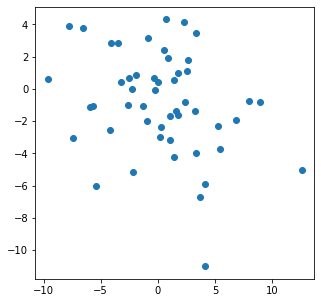

In [24]:
plt.figure(figsize=(5, 5))
Y = X.mm(W.detach()).add(b.detach())
plt.scatter(Y[:, 0], Y[:, 1])

In [25]:
lr = 0.1

for i in range(30):
    l = f(X, W, b)
    print(l.detach())
    l.backward()
    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    W.grad.zero_()
    b.grad.zero_()

tensor(23.4954)
tensor(12.6940)
tensor(7.3749)
tensor(4.6916)
tensor(3.2148)
tensor(2.3453)
tensor(1.7691)
tensor(1.3856)
tensor(1.1313)
tensor(0.9553)
tensor(0.8305)
tensor(0.7370)
tensor(0.6672)
tensor(0.6207)
tensor(0.5826)
tensor(0.5525)
tensor(0.5289)
tensor(0.5113)
tensor(0.4971)
tensor(0.4850)
tensor(0.4748)
tensor(0.4664)
tensor(0.4586)
tensor(0.4522)
tensor(0.4470)
tensor(0.4422)
tensor(0.4385)
tensor(0.4349)
tensor(0.4307)
tensor(0.4275)


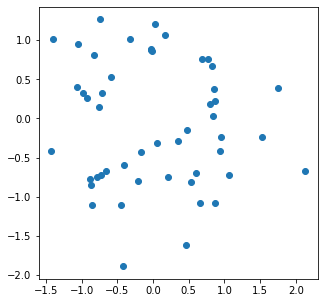

In [26]:
plt.figure(figsize=(5, 5))
Y = X.mm(W.detach()).add(b.detach())
plt.scatter(Y[:, 0], Y[:, 1])

# Время реализовать нейронную сеть

Здесь мы реализуем многослойный перцептрон без использования модуля torch.nn.

## Dataset

In [27]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [29]:
X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)
X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

Подсказка: нейронный сети тяжело учатся, если входы имеют огромные абсолютные значения. Поэтому до обучения каждый признак необходимо нормализовать, причём независимо (исключение составляют свёрточные сети, для них нормализация производится независимо по каналам).

Существует множество способов нормализации данных. Одним из самых популярных - это вычитание среднего и деление результата на стандартное отклонение (этот метод должен быть использован аккуратно, если стандартное отклонение близко к нулю; лучше обрабатывать эти случаи отдельно).
Другими популярными способома является вычитание минимума и деление на разницу между максимумом и минимумом, применение сигмоидной функции и т.д.

Реализуйте нормализацию данных здесь:

In [30]:
mu = X_train.mean(axis=0)
std = X_train.std(axis=0)
std[std == 0] = 1
X_train = (X_train - mu) / std
X_test = (X_test - mu) / std

## Linear layer implementation

In [31]:
class Module:
    def __init__(self):
        self.training = True
        self.children = []

    def forward(self, *input):
        raise NotImplementedError

    def __call__(self, *input):
        return self.forward(*input)

    def parameters(self):
        """Returns list of parameters of module and its children."""
        res = []
        for submodule in self.children:
            res += submodule.parameters()
        for param in res:
            if not isinstance(param, torch.Tensor):
                raise Exception('Parameters must be Tensors.')
            if not param.requires_grad:
                raise Exception('Parameters must require gradients.')
        return res
    
    def zero_grad(self):
        """Sets gradients of all model parameters to zero."""
        for p in self.parameters():
            if p.grad is not None:
                p.grad.detach_()   # detachs gradient Variable from the computational graph
                p.grad.zero_()

    def train(self):
        """Sets module into train mode (for DropOut, BatchNorm, etc)."""
        self.training = True
        for submodule in self.children:
            submodule.train()

    def eval(self):
        """Sets module into evaluation mode."""
        self.training = False
        for submodule in self.children:
            submodule.eval()

In [32]:
class Dense(Module):
    def __init__(self, input_units, output_units):
        """A dense layer is a layer which performs a learned affine transformation:
        f(x) = W x + b
        """
        super(Dense, self).__init__()
        # initialize weights with small random numbers from normal distribution
        scale = np.sqrt(2 / (input_units + output_units))
        self.weights = torch.randn(input_units, output_units, requires_grad=True)
        self.biases = torch.randn(output_units, requires_grad=True)
        self.weights.data *= scale
        self.biases.data *= scale

    def parameters(self):
        return [self.weights, self.biases]
        
    def forward(self, input):
        """Performs an affine transformation:
        f(x) = W x + b
        input shape:  [batch, input_units]  (Tensor)
        output shape: [batch, output units] (Tensor)
        """
        # your code here
        output = input @ self.weights + self.biases
        return output

In [33]:
class ReLU(Module):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs."""
        super(ReLU, self).__init__()

    def parameters(self):
        return []  # ReLU has no parameters
    
    def forward(self, input):
        """Applies elementwise ReLU to [batch, num_units] Tensor matrix."""
        # your code here
        return input * (input > 0)

In [34]:
class LogSoftmax(Module):
    def __init__(self):
        super(LogSoftmax, self).__init__()

    def parameters(self):
        return []
        
    def forward(self, input):
        """Applies softmax to each row and then applies component-wise log.
        Input shape:  [batch, num_units] (Tensor)
        Output shape: [batch, num_units] (Tensor)
        """
        output = input.exp() / (input.exp().sum(-1)).unsqueeze(-1)
        return output.log()

In [35]:
import torch.nn as nn

In [36]:
class MyNetwork(Module):
    def __init__(self, input_size, hidden_layers_size, hidden_layers_number, output_size):
        super(MyNetwork, self).__init__()

        network = []
        network.append(Dense(input_size, hidden_layers_size))
        network.append(ReLU())
        for i in range(hidden_layers_number - 1):
            network.append(Dense(hidden_layers_size, hidden_layers_size))
            network.append(ReLU())
        network.append(Dense(hidden_layers_size, output_size))
        network.append(LogSoftmax())

        self.children = network

    def forward(self, input):
        """Applies all layers of neural network to the input.
        Input shape:  [batch, num_units] (Tensor)
        Output shape: [batch, num_units] (Tensor)
        """
        for child in self.children:
            input = child(input)
        
        return input

## Loss function

In [37]:
def crossentropy(activations, target):
    """Returns negative log-likelihood of target under model
    represented by activations (log probabilities of classes).
    Tip: it is better to average crossentropy among objects
    instead of sum.
    Activations shape: [batch, num_classes] (Tensor)
    Target shape:      [batch]              (Tensor)
    Output shape: 1 (scalar, Tensor)
    """
    return -activations[range(target.shape[0]), target].mean()

## Stochastic Gradient Descent

In [38]:
class SGDOptimizer:
    def __init__(self, parameters, learning_rate):
        self.parameters = parameters
        self.learning_rate = learning_rate

    def step(self):
        """Make one optimization step for parameters in-place.
        Assumes that all parameters are Variable with computed gradient.
        """
        for param in self.parameters:
            param.data -= self.learning_rate * param.grad.data

In [39]:
import torch.utils.data

In [40]:
def run_epoch(dataset, network, prefix='Test loss:', optimizer=None, verbose=True):
    # Change mode for all layers.
    if optimizer:
        network.train()
    else:
        network.eval()

    batch_size = 100
    batchgenerator = torch.utils.data.DataLoader(dataset, batch_size, True)

    avg_loss = 0
    for i, (batch_data, batch_target) in enumerate(batchgenerator):
        if optimizer:
            network.zero_grad()
        batch_output = network(batch_data)
        batch_loss = crossentropy(batch_output, batch_target)
        batch_loss.backward()
        batch_loss = float(batch_loss)
        avg_loss += (batch_loss - avg_loss) / (i + 1)
        if optimizer:
            optimizer.step()
    if verbose:
        print(prefix, avg_loss, flush=True)
    return avg_loss

In [41]:
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

network = MyNetwork(X_train.shape[1], 32, 0, 10)
sgd = SGDOptimizer(network.parameters(), 0.5)

num_epochs = 20
sgd_train_losses = []
sgd_test_losses = []
for i in range(num_epochs):
    loss = run_epoch(train_dataset, network, 'Train loss:', sgd)
    sgd_train_losses.append(loss)
    loss = run_epoch(test_dataset, network, 'Test loss:',  None)
    sgd_test_losses.append(loss)

Train loss: 1.0738722043378015
Test loss: 0.39690343737602235
Train loss: 0.27585516976458685
Test loss: 0.23463469445705415
Train loss: 0.17370419363890374
Test loss: 0.18251388818025588
Train loss: 0.12697122458900723
Test loss: 0.18071738481521607
Train loss: 0.09623066069824356
Test loss: 0.1420673429965973
Train loss: 0.07602805112089431
Test loss: 0.13975680470466614
Train loss: 0.06355450355580874
Test loss: 0.12768156975507736
Train loss: 0.0538682486595852
Test loss: 0.13825826495885848
Train loss: 0.04893994717193502
Test loss: 0.11748176626861095
Train loss: 0.03988778897161994
Test loss: 0.11313324347138405
Train loss: 0.035739601456693235
Test loss: 0.11637146770954132
Train loss: 0.031891934241035154
Test loss: 0.13019417151808738
Train loss: 0.027689510357699225
Test loss: 0.12836344987154008
Train loss: 0.025144671489085474
Test loss: 0.11398202925920486
Train loss: 0.02353823444406901
Test loss: 0.11843206137418746
Train loss: 0.020749252089964493
Test loss: 0.10640302

## Нужно больше оптимизаторов!

In [42]:
class SGDMomentumOptimizer:
    def __init__(self, parameters, learning_rate=0.01, momentum=0.9):
        self.parameters = parameters
        self.prev_grads = [torch.zeros_like(param.data) for param in parameters]
        self.learning_rate = learning_rate
        self.momentum = momentum
    
    def step(self):
        """Make one optimization step for parameters in-place.
        Assumes that all parameters are Variable with computed gradient.
        """
        for i, param in enumerate(self.parameters):
            grad = self.momentum * self.prev_grads[i] + (1 - self.momentum) * param.grad.data
            self.prev_grads[i] = torch.clone(grad).detach()
            param.data -= self.learning_rate * grad

In [43]:
class RMSPropOptimizer:
    def __init__(self, parameters, learning_rate=0.01, beta=0.9, eps=1e-8):
        self.parameters = parameters
        self.learning_rate = learning_rate
        self.beta = beta
        self.eps = eps
        self.prev_grads = [torch.zeros_like(param.data) for param in parameters]
        

    def step(self):
        """Make one optimization step for parameters in-place.
        Assumes that all parameters are Variable with computed gradient.
        """
        for i, param in enumerate(self.parameters):
            grad = self.beta * self.prev_grads[i] + (1 - self.beta) * param.grad.data**2
            self.prev_grads[i] = torch.clone(grad).detach()
            param.data -= self.learning_rate * param.grad.data / (torch.sqrt(grad) + self.eps)

In [44]:
class AdamOptimizer:
    def __init__(self, parameters, learning_rate=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        self.parameters = parameters
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.t = 0
        self.prev_m1 = [torch.zeros_like(param.data) for param in parameters]
        self.prev_m2 = [torch.zeros_like(param.data) for param in parameters]
        

    def step(self):
        """Make one optimization step for parameters in-place.
        Assumes that all parameters are Variable with computed gradient.
        """
        for i, param in enumerate(self.parameters):
            self.t += 1
            m1 = self.beta1 * self.prev_m1[i] + (1 - self.beta1) * param.grad.data
            m2 = self.beta2 * self.prev_m2[i] + (1 - self.beta2) * param.grad.data**2
            self.prev_m1[i] = torch.clone(m1).detach()
            self.prev_m2[i] = torch.clone(m2).detach()
            m1_est = m1 / (1 - self.beta1**self.t)
            m2_est = m2 / (1 - self.beta2**self.t)
            param.data -= self.learning_rate * m1_est / (torch.sqrt(m2_est) + self.eps)

In [45]:
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

In [46]:
network = MyNetwork(X_train.shape[1], 32, 1, 10)
optim = SGDMomentumOptimizer(network.parameters(), 0.5)

num_epochs = 20
sgd_momentum_train_losses = []
sgd_momentum_test_losses = []
for i in range(num_epochs):
    loss = run_epoch(train_dataset, network, 'Train loss:', optim)
    sgd_momentum_train_losses.append(loss)
    loss = run_epoch(test_dataset, network, 'Test loss:',  None)
    sgd_momentum_test_losses.append(loss)

Train loss: 1.6958270626408716
Test loss: 0.7480188727378845
Train loss: 0.4208430573344231
Test loss: 0.3091982066631317
Train loss: 0.1971336587199143
Test loss: 0.21233940720558167
Train loss: 0.12416990952832357
Test loss: 0.18100107610225677
Train loss: 0.09022074272590022
Test loss: 0.16313549131155014
Train loss: 0.07277351032410348
Test loss: 0.15219417810440064
Train loss: 0.060348318889737115
Test loss: 0.14517679214477539
Train loss: 0.049973036628216505
Test loss: 0.14082070887088777
Train loss: 0.04323660529085568
Test loss: 0.14102438539266587
Train loss: 0.03951005371553558
Test loss: 0.14091340005397796
Train loss: 0.03384363418444991
Test loss: 0.13342302814126014
Train loss: 0.030114314119730676
Test loss: 0.13509950041770935
Train loss: 0.02700126071327499
Test loss: 0.13655895367264748
Train loss: 0.02427194526951228
Test loss: 0.1318156123161316
Train loss: 0.021663252862968614
Test loss: 0.13209424763917924
Train loss: 0.020337276692901342
Test loss: 0.12267234902

In [47]:
network = MyNetwork(X_train.shape[1], 32, 1, 10)
optim = RMSPropOptimizer(network.parameters())

num_epochs = 20
rmsprop_train_losses = []
rmsprop_test_losses = []
for i in range(num_epochs):
    loss = run_epoch(train_dataset, network, 'Train loss:', optim)
    rmsprop_train_losses.append(loss)
    loss = run_epoch(test_dataset, network, 'Test loss:',  None)
    rmsprop_test_losses.append(loss)

Train loss: 0.9790757681642258
Test loss: 0.3951204180717468
Train loss: 0.23220155867082734
Test loss: 0.2063836932182312
Train loss: 0.1290872735636575
Test loss: 0.16445472538471223
Train loss: 0.08060296358806748
Test loss: 0.17376239523291587
Train loss: 0.050573181627052176
Test loss: 0.12922589480876923
Train loss: 0.03436283195125205
Test loss: 0.13724106475710868
Train loss: 0.01991265776034977
Test loss: 0.13394027352333068
Train loss: 0.014086459829871143
Test loss: 0.12088451087474823
Train loss: 0.008846274992850211
Test loss: 0.10804536379873753
Train loss: 0.00559002931030201
Test loss: 0.12573828510940074
Train loss: 0.003504674682127578
Test loss: 0.13146790042519568
Train loss: 0.0025946373435934743
Test loss: 0.13872359171509743
Train loss: 0.0016802318693537796
Test loss: 0.11778247207403184
Train loss: 0.0009036163371222626
Test loss: 0.11718433005735278
Train loss: 0.0006120544733546142
Test loss: 0.14635447338223456
Train loss: 0.0007426519109035975
Test loss: 0.

In [52]:
network = MyNetwork(X_train.shape[1], 32, 1, 10)
optim = AdamOptimizer(network.parameters())

num_epochs = 20
adam_train_losses = []
adam_test_losses = []
for i in range(num_epochs):
    loss = run_epoch(train_dataset, network, 'Train loss:', optim)
    adam_train_losses.append(loss)
    loss = run_epoch(test_dataset, network, 'Test loss:',  None)
    adam_test_losses.append(loss)

Train loss: 1.4429009939943038
Test loss: 0.5804416418075562
Train loss: 0.30385231785476213
Test loss: 0.23656160831451417
Train loss: 0.12539377915007727
Test loss: 0.2193530261516571
Train loss: 0.06185844593814441
Test loss: 0.15878635719418527
Train loss: 0.040604921856096814
Test loss: 0.15491996482014656
Train loss: 0.02442644563104425
Test loss: 0.1518046647310257
Train loss: 0.015586350711860826
Test loss: 0.16484163627028464
Train loss: 0.011006047816148827
Test loss: 0.15084458217024804
Train loss: 0.008942971238866448
Test loss: 0.1462010622024536
Train loss: 0.007348121376708152
Test loss: 0.15473982319235802
Train loss: 0.005675997235812248
Test loss: 0.14033473581075667
Train loss: 0.0048460578545928
Test loss: 0.14714743494987487
Train loss: 0.004085443672790591
Test loss: 0.14160461872816085
Train loss: 0.0037329845196966615
Test loss: 0.13714438378810884
Train loss: 0.003270971913090242
Test loss: 0.1403486594557762
Train loss: 0.0029153793667709193
Test loss: 0.13878

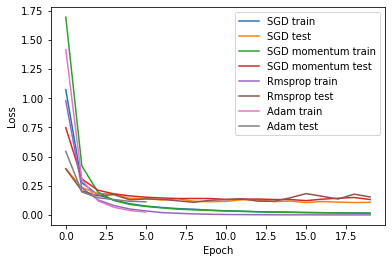

In [49]:
plt.plot(sgd_train_losses, label='SGD train')
plt.plot(sgd_test_losses, label='SGD test')
plt.plot(sgd_momentum_train_losses, label='SGD momentum train')
plt.plot(sgd_momentum_test_losses, label='SGD momentum test')
plt.plot(rmsprop_train_losses, label='Rmsprop train')
plt.plot(rmsprop_test_losses, label='Rmsprop test')
plt.plot(adam_train_losses, label='Adam train')
plt.plot(adam_test_losses, label='Adam test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
pass

## DropOut

In [50]:
class DenseWithDropOut(Module):
    def __init__(self, input_units, output_units, dropout_rate, nonlinearity):
        """A dense layer is a layer which performs a learned
        affine transformation and applies dropout:
        m ~ Bernoulli(1 - p, size=output_units)
        f(x) = g(W x + b) o m
        """
        super(DenseWithDropOut, self).__init__()
        self.dropout_rate = dropout_rate
        self.nonlinearity = nonlinearity
        
        scale = np.sqrt(2 / (input_units + output_units))
        self.weights = torch.randn(input_units, output_units, requires_grad=True)
        self.biases = torch.randn(output_units, requires_grad=True)
        self.weights.data *= scale
        self.biases.data *= scale

    def parameters(self):
        return [self.weights, self.biases]
        
    def forward(self, input, training=True):
        """Performs an affine transformation with dropout.
        In training mode:
        m ~ Bernoulli(1 - p, size=output_units)
        f(x) = g(W x + b) o m
        In evaluation mode:
        f(x) = g(W x + b) (1 - p)
        input shape:  [batch, input_units]  (Variable)
        output shape: [batch, output units] (Variable)
        """
        output = self.nonlinearity(input @ self.weights + self.biases)
        
        if training:
            m = np.random.binomial(n=1, p=1-self.dropout_rate, size=self.weights.shape[1])
            output = output * torch.tensor(m)
        else:
            output = output * (1 - self.dropout_rate)
        return output

Проверим, правда ли полносвязная сеть с dropout работает быстрее, чем обычная полносвязная сеть.

In [51]:
width = 2000
network1 = [
    DenseWithDropOut(width, width, 0.9, lambda x: ReLU().forward(x)),
    DenseWithDropOut(width, width, 0.9, lambda x: ReLU().forward(x)),
    DenseWithDropOut(width, width, 0.9, lambda x: ReLU().forward(x)),
    DenseWithDropOut(width, 1, 0, lambda x: x)
]
network2 = [
    Dense(width, width),
    ReLU(),
    Dense(width, width),
    ReLU(),
    Dense(width, width),
    ReLU(),
    Dense(width, 1)
]

X = torch.randn(10000, width)

# check whether DenseWithDropOut works faster than Dense
def test_network(network):
    x = torch.clone(X)
    for layer in network:
        x = layer.forward(x)
    x.mean().backward()
    for layer in network:
        x = layer.zero_grad()

test_network(network1)
%timeit test_network(network1)
%timeit test_network(network2)

6.39 s ± 946 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.99 s ± 518 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Для менее глубоких сетей, низких коэффициентов dropout и меньших размеров минибатча увеличение производительности не такое значительное или его может не быть вообще.